In [31]:
%matplotlib inline
# %matplotlib qt

Gradient decay
==========================================

Some results worth saving and displaying for visualization and understanding

1/ Decay of gradient variances with increasing qubit count
---------------------------

First importing the relevant packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from gadget_plots import *

data_folder = '../../results/data/'

# colours = [['#36226b', '#22236b', '#22656b', '#226b2b', '#606b22', '#6b4d22', '#6b2a22'],
#            ['#6f45d8', '#4547d8', '#45ccd8', '#45d859', '#c2d845', '#d89d45', '#d85645'],
#            ['#977dd8', '#7d7fd8', '#7dd1d8', '#7dd889', '#cbd87d', '#d8b47d', '#d8887d']]
# colours = np.array([plt.cm.PuRd(np.linspace(0, 1, 7)), 
#                     plt.cm.BuPu(np.linspace(0, 1, 7)),
#                     plt.cm.GnBu(np.linspace(0, 1, 7)),
#                     plt.cm.YlGn(np.linspace(0, 1, 7)),
#                     plt.cm.Greys(np.linspace(0, 1, 7))])
colours = np.array([plt.cm.Purples(np.linspace(0, 1, 10)), 
                    plt.cm.Blues(np.linspace(0, 1, 10)),
                    plt.cm.Oranges(np.linspace(0, 1, 10)),
                    plt.cm.Reds(np.linspace(0, 1, 10)),
                    plt.cm.Greys(np.linspace(0, 1, 10))])[:, 3:]

Exponential decay of the global Hamiltonian
$$H_G = \bigotimes_{i=1}^n \sigma_i^z $$

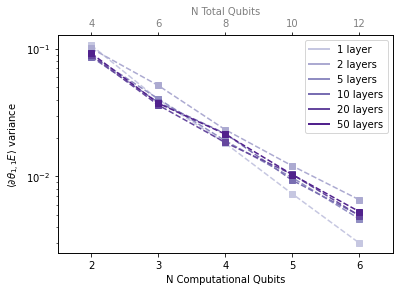

In [10]:
file_glob = data_folder + 'gradients/220401_global_circuit_6qubits_50layers_1000samples.dat'
plot_variances_vs_qubits([file_glob], [colours[0]])

Trainability of the local Hamiltonian
$$H_L = Z_1^{(c)} Z_2^{(c)}$$

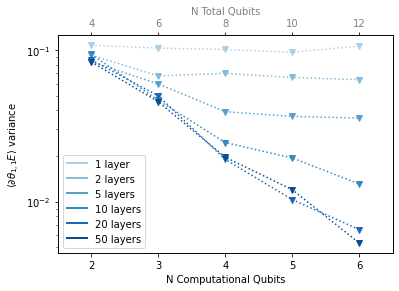

In [11]:
file_loc = data_folder + 'gradients/220401_local_circuit_6qubits_50layers_1000samples.dat'
plot_variances_vs_qubits([file_loc], [colours[1]])

Equivalent plot for the gadget decomposition of the global Hamiltonian
$$H^{gad} = H^{anc} + \lambda V 
    = (\mathbb{I} - Z_1^{(a)} Z_2^{(a)}) + (\mathbb{I} - Z_1^{(a)} Z_3^{(a)}) + (\mathbb{I} - Z_1^{(a)} Z_4^{(a)})
    + (\mathbb{I} - Z_2^{(a)} Z_3^{(a)}) + (\mathbb{I} - Z_2^{(a)} Z_4^{(a)}) + (\mathbb{I} - Z_3^{(a)} Z_4^{(a)}) 
    + \lambda (Z_1^{(c)} \otimes X_1^{(a)} + Z_2^{(c)} \otimes X_2^{(a)} + Z_3^{(c)} \otimes X_3^{(a)} + Z_4^{(c)} \otimes X_4^{(a)})$$
<span style="color:red">/!\ wrong implementation</span>.

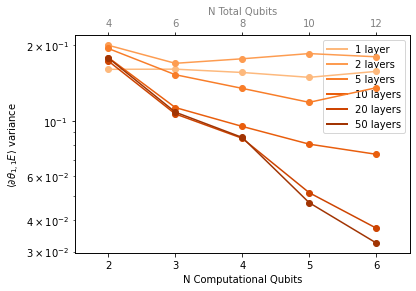

In [12]:
file_gad = data_folder + 'gradients/220402_gadget_circuit_6qubits_50layers_1000samples.dat'
plot_variances_vs_qubits([file_gad], [colours[2]])

Combining the plots of the normalized global, local and gadget Hamiltonians
<span style="color:red">/!\ wrong implementation</span>.

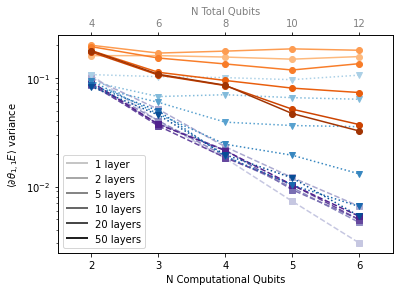

In [13]:
file_list = [data_folder + 'gradients/220401_global_circuit_6qubits_50layers_1000samples.dat',
             data_folder + 'gradients/220401_local_circuit_6qubits_50layers_1000samples.dat',
             data_folder + 'gradients/220402_gadget_circuit_6qubits_50layers_1000samples.dat']

plot_variances_vs_qubits(file_list, colours, normalize=False)

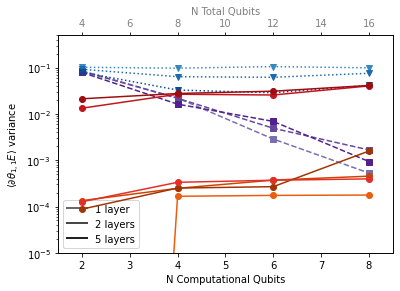

In [14]:
file_list = [data_folder + 'gradients/220406_global_circuit_8qubits_5layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220406_local_circuit_8qubits_5layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220406_gadget3_circuit_8qubits_5layers_0.5lambda_200samples.dat', 
             data_folder + 'gradients/220406_gadget2_circuit_8qubits_5layers_0.5lambda_200samples.dat']

plot_variances_vs_qubits(file_list, colours[:,-4:], normalize=False, limits=[1e-5, 5e-1])

combining data from:  
'gradients/220407_global_circuit_10qubits_50layers_0.5lambda_1000samples.dat' with 'gradients/220412_global_circuit_16qubits_50layers_0.5lambda_1000samples.dat', and
'gradients/220407_local_circuit_10qubits_50layers_0.5lambda_1000samples.dat' with 'gradients/220412_local_circuit_16qubits_50layers_0.5lambda_1000samples.dat'
'gradients/220410_gadget3_circuit_8qubits_50layers_0.5lambda_1000samples.dat' with 'gradients/220412_gadget3_circuit_10qubits_50layers_0.5lambda_1000samples.dat'

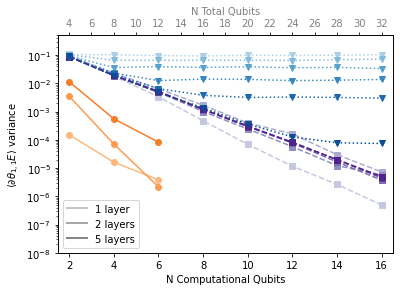

In [7]:
file_list = [data_folder + 'gradients/220412_global_circuit_16qubits_50layers_0.5lambda_1000samples-comb.dat',
             data_folder + 'gradients/220412_local_circuit_16qubits_50layers_0.5lambda_1000samples-comb.dat',
             data_folder + 'gradients/220411_gadget2_circuit_8qubits_50layers_0.5lambda_1000samples.dat',
             data_folder + 'gradients/220412_gadget3_circuit_10qubits_50layers_0.5lambda_1000samples-comb.dat']
# norm_file = data_folder + 'norms/gadget_6qubits_0.5lambda.dat'
# norm_dict = {'gadget': np.loadtxt(norm_file)[:,1]}
# %matplotlib widget
plot_variances_vs_qubits(file_list, colours, normalize=True, limits=[1e-8, 5e-1], lambda_value=0.5)

In [6]:
norm_file = data_folder + 'norms/gadget_6qubits_0.5lambda.dat'
norm_dict = {'gadget': np.loadtxt(norm_file)[:,1]}
print(norm_dict['gadget'])

[1.125 4.375 9.625]


Variance evolution on the script using the StronglyEntanglingLayers and the ExpvalCost

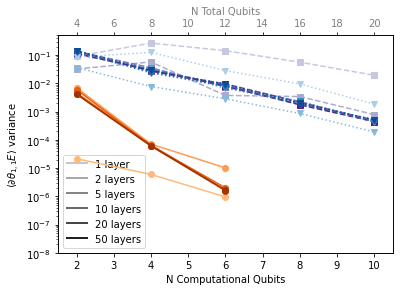

In [26]:
file_list = [data_folder + 'gradients/220413_global_10qubits_50layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220413_local_10qubits_50layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220413_gadget2_6qubits_50layers_0.5lambda_200samples.dat']

plot_variances_vs_qubits(file_list, colours, normalize=True, limits=[1e-8, 5e-1])

Variance evolution when using the HardwareEfficientAnsatz and the ExpvalCost

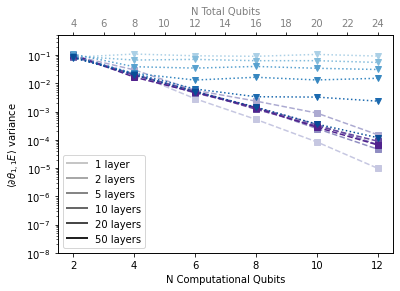

In [27]:
file_list = [data_folder + 'gradients/220414_global_12qubits_50layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220414_local_12qubits_50layers_0.5lambda_200samples.dat']

plot_variances_vs_qubits(file_list, colours, normalize=True, limits=[1e-8, 5e-1])

2/ Exploring the effect of λ and depth
-------------

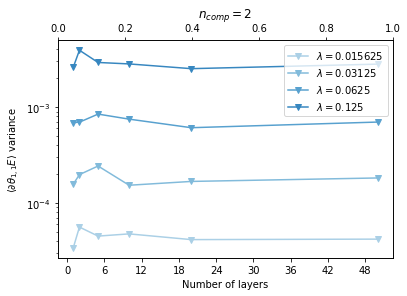

In [ ]:
file = data_folder + 'gradients/220404_gadget_circuit_2qubits_50layers_200samples.dat'
plot_variances_vs_layers([file], [colours[1]])

Training
=======

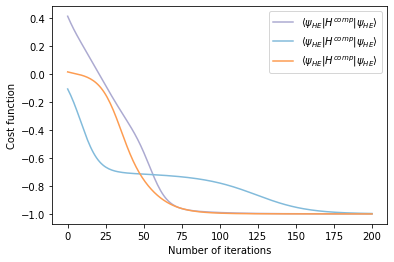

In [ ]:
file_list = [data_folder + 'training/220408_training_global_4qubits_2layers_200iterations.dat',
             data_folder + 'training/220408_training_global_5qubits_2layers_200iterations.dat',
             data_folder + 'training/220408_training_global_6qubits_2layers_200iterations.dat']

plot_training(file_list, colours[:, [1, 3, 5]])


In [ ]:
# file_list = [data_folder + 'training/220408_training_local_4qubits_2layers_200iterations.dat',
#              data_folder + 'training/220408_training_local_5qubits_2layers_200iterations.dat',
#              data_folder + 'training/220408_training_local_6qubits_2layers_200iterations.dat']

# plot_training(file_list, colours[1, [1, 3, 5]])

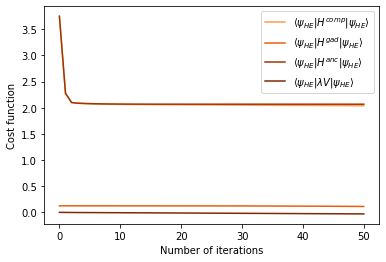

In [ ]:
# file_list = ['../../results/data/220408_training_gadget_4qubits_2layers_200iterations_0.5lambda.dat', 
#              '../../results/data/220408_training_gadget_5qubits_2layers_200iterations_0.5lambda.dat', 
#              '../../results/data/220408_training_gadget_6qubits_2layers_200iterations_0.5lambda.dat']
file_list = [data_folder + 'training/220408_training_gadget_6qubits_2layers_50iterations_0.5lambda.dat']

plot_training(file_list, [colours[2, [1, 3, 5, 6]]])